In [2]:
from dependencies import * 

_ColormakerRegistry()

# Read trajectory

In [32]:
stepsize = 1
run = vasp.read_vasp_xml("../vasprun2.xml", index = slice(0, -1, stepsize))
run = list(run)

In [33]:
Lis = [atom.index for atom in run[0] if atom.symbol == "Li"]

In [34]:
from ase.md.analysis import DiffusionCoefficient

D = DiffusionCoefficient(run, stepsize, Lis)

In [35]:
D.calculate()

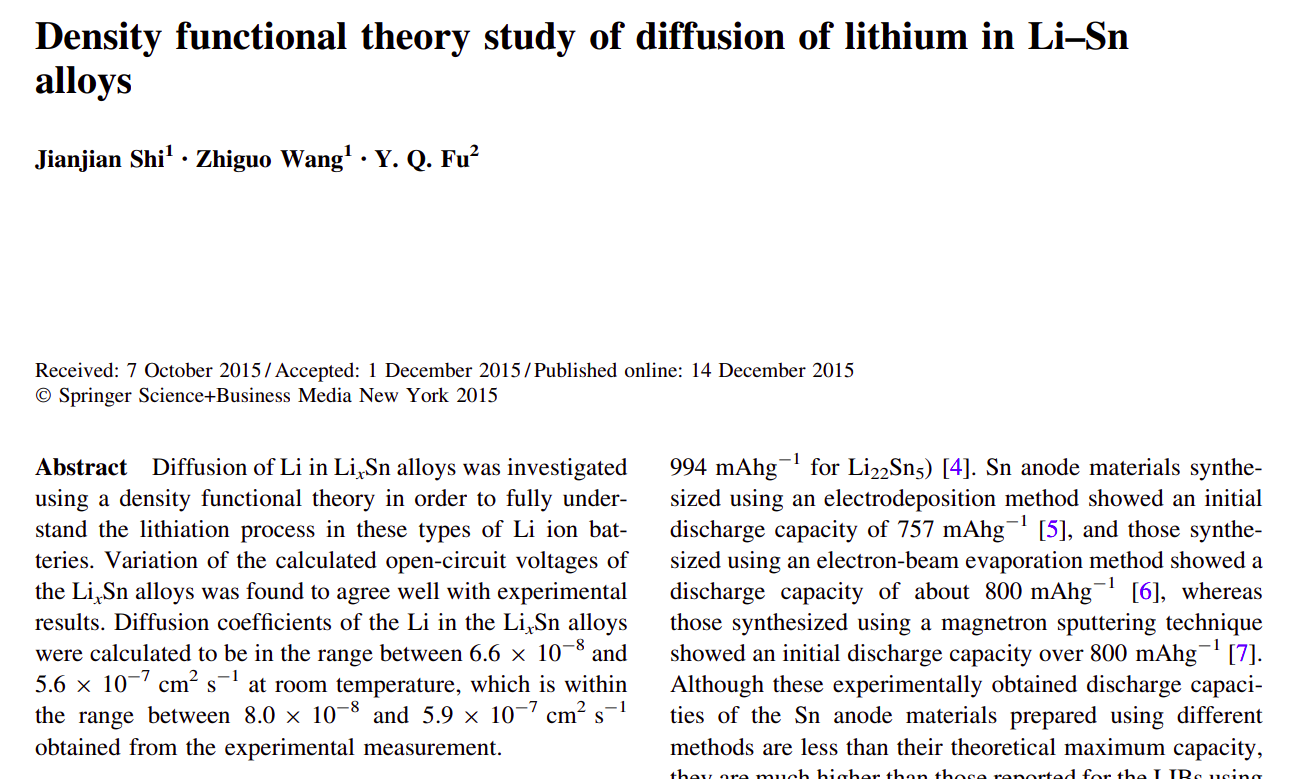

In [36]:
D.print_data()

---
Species:   Li
---
Segment     0:         Diffusion Coefficient = 0.0000405870 Å^2/fs; Intercept = 3.3195275260 Å^2;
---
Mean Diffusion Coefficient (X, Y and Z) : Li = 0.0000405870 Å^2/fs; Std. Dev. = 0.0000101096 Å^2/fs
---


In [37]:
from ase import units
D.get_diffusion_coefficients()[0][0] * units.fs * 10e-1

4.0586982103658124e-05

# Preprocess for gdynet

In [88]:
F1, F2

(7992, 8991)

In [92]:
groups = ['train', 'val', 'test']
stepsize = 1
traj = vasp.read_vasp_xml("../vasprun2.xml", index = slice(0, -1, stepsize))
traj = list(traj)
F = len(traj)
F1, F2 = F//10 * 8, F//10 * 9

for group in groups:
    
    if group == 'train':
        start = 0
        end = F1
    elif group == 'val':
        start = F1
        end = F2
    elif group == 'test':
        start = F2
        end = -1
        
    run = traj[start:end]
    
    traj_coords = np.array([i.get_positions() for i in run])
    traj_coords.shape

    lattices = np.array([i.get_cell()[:] for i in run])
    lattices.shape

    atom_types = run[0].get_atomic_numbers()
    atom_types.shape

    target_index = np.array([
        atom.index for atom in run[0] if atom.symbol == "Li"
    ])
#     target_index = np.array([0])
    target_index

    np.savez_compressed("sn32li16-{}.npz".format(group), 
                        traj_coords=traj_coords, 
                        lattices = lattices, 
                        atom_types = atom_types, 
                        target_index = target_index)

In [89]:
view(traj)

In [91]:
vasp.write_vasp("../POSCAR", traj[0], sort = True, vasp5 = True)